In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Import packages

In [44]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Import dataset

In [2]:
heart_disease=pd.read_csv("C:/Users/bhumi/Downloads/heart_disease_uci.csv")
heart_disease

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Drop irrerelevant features

In [3]:
heart_disease.drop(columns=['cp', 'restecg', 'slope', 'thal'], inplace=True)

# Encoding the categorical variables

In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [5]:
heart_disease['sex']=lb.fit_transform(heart_disease['sex'])
heart_disease['dataset']=lb.fit_transform(heart_disease['dataset'])
heart_disease['fbs']=lb.fit_transform(heart_disease['fbs'])
heart_disease['exang']=lb.fit_transform(heart_disease['exang'])

In [6]:
heart_disease

,id,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
0,1,63,1,0,145.0,233.0,1,150.0,0,2.3,0.0,0
1,2,67,1,0,160.0,286.0,0,108.0,1,1.5,3.0,2
2,3,67,1,0,120.0,229.0,0,129.0,1,2.6,2.0,1
3,4,37,1,0,130.0,250.0,0,187.0,0,3.5,0.0,0
4,5,41,0,0,130.0,204.0,0,172.0,0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,127.0,333.0,1,154.0,0,0.0,NaN,1
916,917,62,1,3,NaN,139.0,0,NaN,2,NaN,NaN,0
917,918,55,1,3,122.0,223.0,1,100.0,0,0.0,NaN,2
918,919,58,1,3,NaN,385.0,1,NaN,2,NaN,NaN,0


# Filling the missing values

In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')

In [10]:
heart_disease[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']] = imputer.fit_transform(heart_disease[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']])

In [11]:
heart_disease

,id,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
0,1,63.0,1.0,0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0
1,2,67.0,1.0,0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2
2,3,67.0,1.0,0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1
3,4,37.0,1.0,0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0
4,5,41.0,0.0,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54.0,0.0,3,127.0,333.0,1.0,154.0,0.0,0.0,0.0,1
916,917,62.0,1.0,3,130.0,139.0,0.0,140.0,2.0,0.5,0.0,0
917,918,55.0,1.0,3,122.0,223.0,1.0,100.0,0.0,0.0,0.0,2
918,919,58.0,1.0,3,130.0,385.0,1.0,140.0,2.0,0.5,0.0,0


# Checking the null values

In [12]:
heart_disease.isnull().sum()

id          0
age         0
sex         0
dataset     0
trestbps    0
chol        0
fbs         0
thalch      0
exang       0
oldpeak     0
ca          0
num         0
dtype: int64

# Extracting the independent and dependent variable

In [13]:
x = heart_disease.drop(columns=['sex'])
y = heart_disease['sex']

In [14]:
x

,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
0,1,63.0,0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0
1,2,67.0,0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2
2,3,67.0,0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1
3,4,37.0,0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0
4,5,41.0,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
915,916,54.0,3,127.0,333.0,1.0,154.0,0.0,0.0,0.0,1
916,917,62.0,3,130.0,139.0,0.0,140.0,2.0,0.5,0.0,0
917,918,55.0,3,122.0,223.0,1.0,100.0,0.0,0.0,0.0,2
918,919,58.0,3,130.0,385.0,1.0,140.0,2.0,0.5,0.0,0


In [15]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
915    0.0
916    1.0
917    1.0
918    1.0
919    1.0
Name: sex, Length: 920, dtype: float64

# Splitting training and testing data

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train

,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
880,881,62.0,3,130.0,170.0,0.0,120.0,1.0,3.0,0.0,4
457,458,54.0,1,150.0,223.0,0.0,122.0,0.0,0.0,0.0,0
797,798,51.0,3,130.0,339.0,0.0,140.0,2.0,0.5,0.0,3
25,26,50.0,0,120.0,219.0,0.0,158.0,0.0,1.6,0.0,0
84,85,52.0,0,120.0,325.0,0.0,172.0,0.0,0.2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,107,59.0,0,140.0,177.0,0.0,162.0,1.0,0.0,1.0,2
270,271,61.0,0,140.0,207.0,0.0,138.0,1.0,1.9,1.0,1
860,861,75.0,3,160.0,310.0,1.0,112.0,1.0,2.0,0.0,0
435,436,53.0,1,140.0,216.0,0.0,142.0,1.0,2.0,0.0,0


In [19]:
y_train

880    1.0
457    1.0
797    1.0
25     0.0
84     1.0
      ... 
106    1.0
270    1.0
860    1.0
435    0.0
102    0.0
Name: sex, Length: 736, dtype: float64

In [42]:
x_test

,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
319,320,36.0,1,120.0,166.0,0.0,180.0,0.0,0.0,0.0,0
377,378,45.0,1,140.0,224.0,1.0,122.0,0.0,0.0,0.0,0
538,539,48.0,1,160.0,329.0,0.0,92.0,1.0,1.5,0.0,1
296,297,59.0,0,164.0,176.0,1.0,90.0,0.0,1.0,2.0,3
531,532,40.0,1,150.0,392.0,0.0,130.0,0.0,2.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
382,383,46.0,1,140.0,275.0,0.0,165.0,1.0,0.0,0.0,0
97,98,60.0,0,150.0,258.0,0.0,157.0,0.0,2.6,2.0,3
906,907,61.0,3,120.0,337.0,0.0,98.0,1.0,0.0,0.0,3
467,468,55.0,1,120.0,270.0,0.0,140.0,0.0,0.0,0.0,0


In [43]:
y_test

319    1.0
377    1.0
538    1.0
296    1.0
531    0.0
      ... 
382    1.0
97     0.0
906    1.0
467    1.0
732    1.0
Name: sex, Length: 184, dtype: float64

# Model creation 

In [21]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [22]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Define the hyperparameters grid for grid search

In [28]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


# Perform grid search with cross-validation

In [30]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

# Get the best parameters and best score

In [31]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [32]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}
Best Score: 0.8125574554145982


# Use the best model for prediction

In [34]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the best model

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.44      0.18      0.26        44
         1.0       0.78      0.93      0.85       140

    accuracy                           0.75       184
   macro avg       0.61      0.56      0.55       184
weighted avg       0.70      0.75      0.71       184



In [39]:
print(confusion_matrix(y_test, y_pred))

[[  8  36]
 [ 10 130]]


# Visualization

In [40]:
importance = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = importance.argsort()[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]


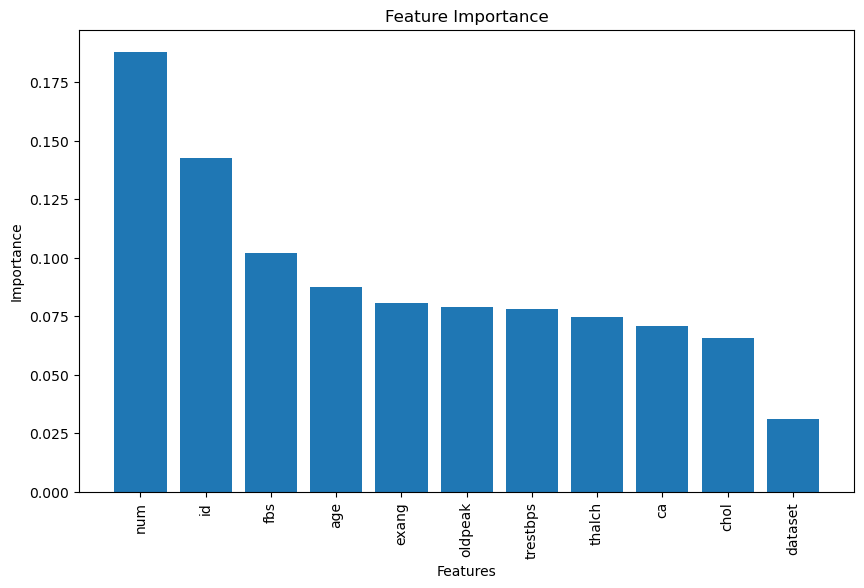

In [41]:
# Create plot
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), importance[indices])
plt.xticks(range(x.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
